In [1]:
import pandas
import matplotlib.pyplot as plt

enade2017=pandas.read_csv("../../MICRODADOS_ENADE_2017.txt", sep=';',dtype={"DS_VT_ESC_OFG": str, 
                                                                               'DS_VT_ESC_OCE':str,
                                                                              'DS_VT_ACE_OCE':str,
                                                                              'NT_GER':str,
                                                                              'NT_FG':str,
                                                                              'NT_OBJ_FG':str,
                                                                              'NT_DIS_FG':str,
                                                                              'NT_CE':str,
                                                                              'NT_OBJ_CE':str,
                                                                              'NT_DIS_CE':str})
print(enade2017.shape)

(537436, 150)


In [5]:
print(enade2017.columns)

Index(['NU_ANO', 'CO_IES', 'CO_CATEGAD', 'CO_ORGACAD', 'CO_GRUPO', 'CO_CURSO',
       'CO_MODALIDADE', 'CO_MUNIC_CURSO', 'CO_UF_CURSO', 'CO_REGIAO_CURSO',
       ...
       'QE_I72', 'QE_I73', 'QE_I74', 'QE_I75', 'QE_I76', 'QE_I77', 'QE_I78',
       'QE_I79', 'QE_I80', 'QE_I81'],
      dtype='object', length=150)


In [16]:
tabela = pandas.DataFrame(enade2017, columns=['NT_GER', 'CO_GRUPO', 'CO_IES', 'QE_I04', 'QE_I05', 'QE_I08', 'QE_I12'])
tabela.head(10)

,NT_GER,CO_GRUPO,CO_IES,QE_I04,QE_I05,QE_I08,QE_I12
0,"52,6",5710,1,D,F,B,A
1,"63,1",5710,1,E,D,B,A
2,"33,7",5710,1,E,F,F,A
3,"58,1",5710,1,D,D,B,A
4,"46,3",5710,1,D,F,F,A
5,"64,2",5710,1,B,B,C,A
6,"41,4",5710,1,D,D,C,E
7,"48,8",5710,1,D,E,C,A
8,"52,9",5710,1,E,F,E,A
9,"62,7",5710,1,D,D,C,A


In [17]:
##limpeza dos dados

#substitui vírgula por ponto
tabela['NT_GER'] = tabela['NT_GER'].str.replace(',', '.')

tabela=tabela.loc[(tabela['NT_GER'].notnull())]
#print(tabela['NT_GER'])
#converte de str para float
tabela['NT_GER'] = pandas.to_numeric(tabela['NT_GER'])

tabela['NT_GER'].describe()

count    449932.000000
mean         43.523969
std          14.080110
min           0.000000
25%          33.400000
50%          42.900000
75%          53.100000
max          98.100000
Name: NT_GER, dtype: float64

In [18]:
#Calcula a média de um curso especifico
#Código da área de enquadramento do curso no Enade == ciencia da computacao

ccomp = tabela[tabela['CO_GRUPO']==4004]

#print(ccomp)
ccomp['NT_GER'].describe()

count    8489.000000
mean       43.262775
std        13.633212
min         0.000000
25%        33.700000
50%        42.300000
75%        52.400000
max        95.100000
Name: NT_GER, dtype: float64

In [15]:
#do curso do IFNMG
ifccomp = ccomp[ccomp['CO_IES']==3188]
ifccomp.describe()

,NT_GER,CO_GRUPO,CO_IES
count,6.000000,6.0,6.0
mean,52.883333,4004.0,3188.0
std,8.564442,0.0,0.0
min,40.300000,4004.0,3188.0
25%,48.325000,4004.0,3188.0
50%,53.450000,4004.0,3188.0
75%,58.875000,4004.0,3188.0
max,62.800000,4004.0,3188.0


In [19]:
#somente as notas de quem respondeu a questão sobre auxilio permanencia
'''
12. Ao longo da sua trajetória acadêmica, você recebeu algum tipo de auxílio permanência? No caso de haver
mais de uma opção, marcar apenas a bolsa de maior duração.
A ( ) Nenhum.
B ( ) Auxílio moradia.
C ( ) Auxílio alimentação.
D ( ) Auxílio moradia e alimentação.
E ( ) Auxílio permanência.
F ( ) Outro tipo de auxílio.
'''
ccomp=ccomp.loc[(ccomp['QE_I12'].notnull())]
ccomp.NT_GER.describe()

count    8408.000000
mean       43.324619
std        13.626419
min         0.000000
25%        33.800000
50%        42.300000
75%        52.500000
max        95.100000
Name: NT_GER, dtype: float64

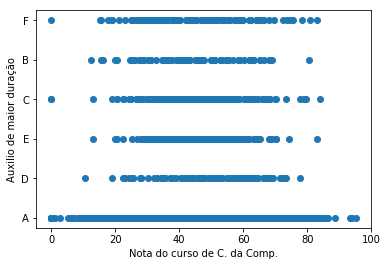

In [21]:
import matplotlib.pyplot as plt
#visualmente
plt.scatter( ccomp.NT_GER, ccomp.QE_I12)
plt.ylabel('Auxilio de maior duração')
plt.xlabel('Nota do curso de C. da Comp.')
plt.show()



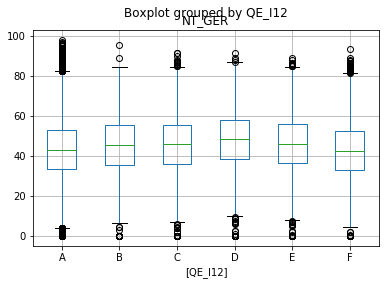

In [23]:
#Como verificar se a média dos alunos do campo QE_I12 para todos os alunos são realmente diferentes
qe12 = pandas.DataFrame(tabela, columns=['NT_GER', 'QE_I12'])
qe12.boxplot(by='QE_I12')

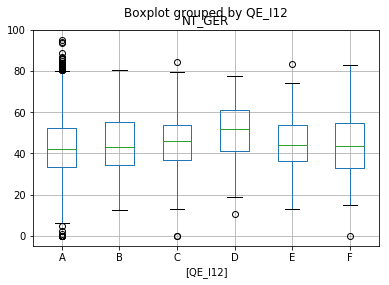

In [24]:
#para os alunos de computacao
qe12 = pandas.DataFrame(ccomp, columns=['NT_GER', 'QE_I12'])
qe12.boxplot(by='QE_I12')

In [28]:
'''
12. Ao longo da sua trajetória acadêmica, você recebeu algum tipo de auxílio permanência? No caso de haver
mais de uma opção, marcar apenas a bolsa de maior duração.
A ( ) Nenhum.
B ( ) Auxílio moradia.
C ( ) Auxílio alimentação.
D ( ) Auxílio moradia e alimentação.
E ( ) Auxílio permanência.
F ( ) Outro tipo de auxílio.
'''
#nota geral agrupada pela questão 12
tabela['NT_GER'].groupby(tabela['QE_I12']).describe()

,count,mean,std,min,25%,50%,75%,max
QE_I12,,,,,,,,
A,403385.0,43.440981,14.041435,0.0,33.4,42.8,53.0,98.1
B,3561.0,45.761500,14.196538,0.0,35.6,45.4,55.7,95.4
C,8416.0,45.924632,14.243257,0.0,36.1,45.8,55.6,91.6
D,4706.0,48.133978,14.380165,0.0,38.6,48.6,58.0,91.6
E,11713.0,46.066524,13.913265,0.0,36.5,46.0,55.8,88.8
F,11087.0,43.101542,13.853401,0.0,33.1,42.6,52.5,93.7


In [26]:

#nota geral agrupada pela questão 12 computação
ccomp['NT_GER'].groupby(tabela['QE_I12']).describe()

,count,mean,std,min,25%,50%,75%,max
QE_I12,,,,,,,,
A,7679.0,43.062052,13.594568,0.0,33.600,42.10,52.20,95.1
B,83.0,44.830120,14.624268,12.5,34.650,43.30,55.30,80.6
C,206.0,45.948058,13.607282,0.0,36.725,46.00,54.00,84.1
D,112.0,50.495536,13.886057,10.7,41.175,51.75,60.90,77.6
E,193.0,45.510881,11.642869,13.0,36.400,44.20,53.60,83.1
F,135.0,44.256296,15.002018,0.0,33.050,43.40,54.65,83.0


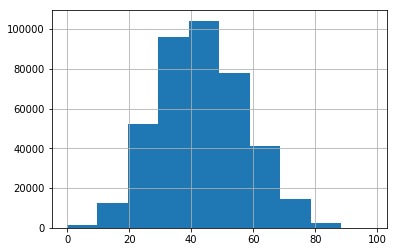

In [35]:

qe05.NT_GER.loc[qe05.QE_I12 =='A'].hist()

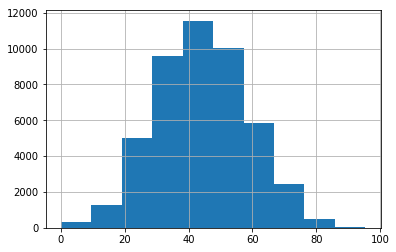

In [36]:
qe05.NT_GER.loc[qe05.QE_I12 !='A'].hist()